In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")

# Availability

In [4]:
brm = pd.read_csv("../generated/brm_cleaned.csv")
frb = pd.read_csv("../generated/frb_cleaned.csv")

### Calculating the whole fleet size

We assume that the fleet size is not altered over the course of the year

In [10]:
brm_fleet_size = brm["b_number"].nunique()
print("Bremen fleet size: ",brm_fleet_size)

frb_fleet_size = frb["b_number"].nunique()
print("Freiburg fleet size: ",frb_fleet_size)

Bremen fleet size:  441
Freiburg fleet size:  435


### Availability of bikes over time per Day

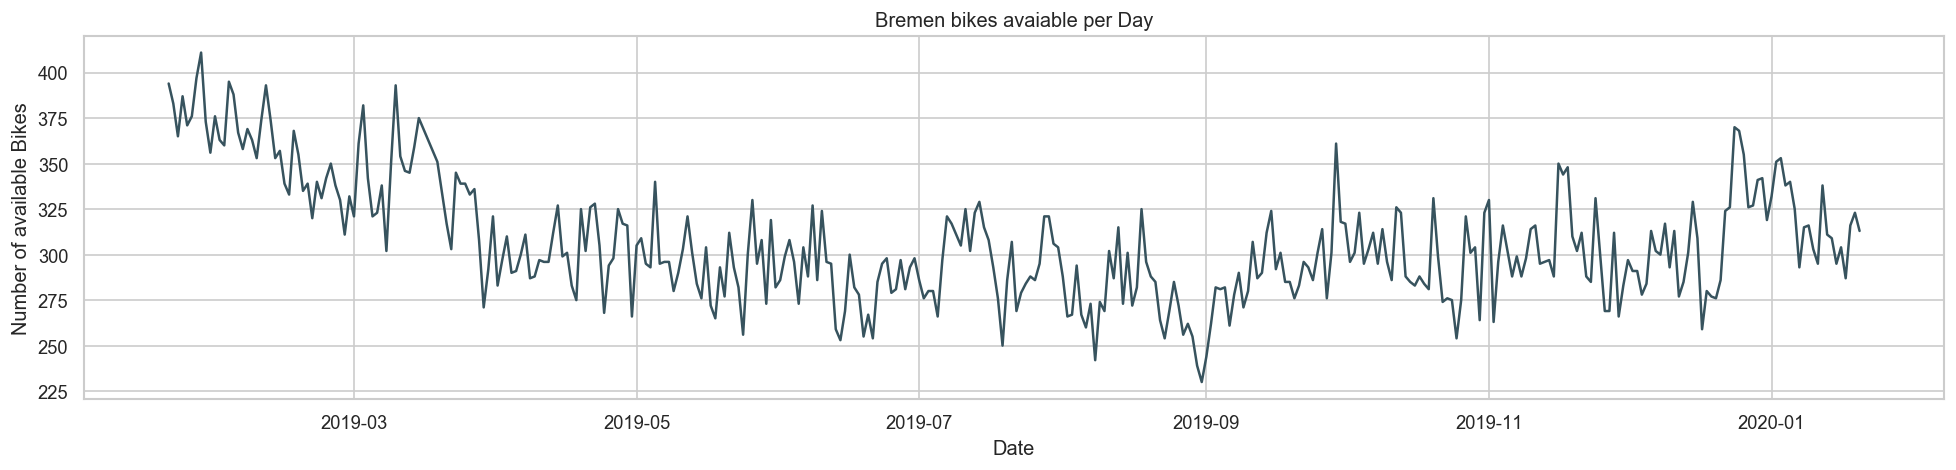

In [14]:
brm["day"] = pd.to_datetime(brm["day"])
brm_Date_avail = brm_fleet_size - brm.groupby("day")["b_number"].nunique()

fig,ax = plt.subplots(figsize=(20,4), dpi= 120)

ax.plot(brm_Date_avail)
ax.set(xlabel="Date",
       ylabel="Number of available Bikes",
       title="Bremen bikes avaiable per Day")

plt.show()


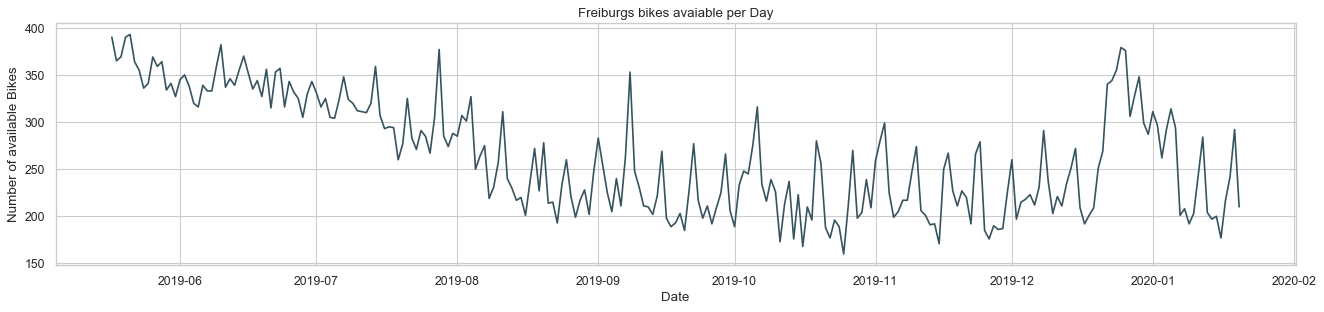

In [15]:
frb["day"] = pd.to_datetime(frb["day"])
frb_Date_avail = frb_fleet_size - frb.groupby("day")["b_number"].nunique()

fig, ax = plt.subplots(figsize=(20,4), dpi= 80)

ax.plot(frb_Date_avail)
ax.set(xlabel="Date",
       ylabel="Number of available Bikes",
       title="Freiburgs bikes avaiable per Day")

plt.show()

### Availability by time of day (Bremen)

In [ ]:
brm_time_avail = brm.groupby(["day","time"])["b_number"].nunique()
brm_time_avail = brm_fleet_size - pd.DataFrame(brm_time_avail)

fig,ax = plt.subplots(figsize=(16,8)) 
sns.boxplot(x=brm_time_avail.index.get_level_values(1), y=brm_time_avail["b_number"],ax=ax)
plt.ylabel("Number of bikes")
plt.show()

### Availability by time of day (Freiburg)

In [ ]:
frb_time_avail = frb.groupby(["day","time"])["b_number"].nunique()
frb_time_avail = frb_fleet_size - pd.DataFrame(frb_time_avail)

fig,ax = plt.subplots(figsize=(16,4)) 

sns.boxplot(x=frb_time_avail.index.get_level_values(1), y=frb_time_avail["b_number"],ax=ax)
plt.ylabel("Number of bikes")
plt.show()

### Availability hourly in Bremen

In [6]:
#mapping avaiability to our DF
brm["hour"]=brm["time"].map(lambda x:int(x[0:2]))


In [7]:
brm

,Unnamed: 0,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,distance,hour
0,0,2019-06-14,22:30:00,20507,bremen,0 days 00:08:00.000000000,53.078923,8.884911,53.074731,8.876003,0.755886,22
1,1,2019-06-28,13:07:00,20507,bremen,0 days 00:49:00.000000000,53.078923,8.884911,53.073298,8.794316,6.084054,13
2,2,2019-06-28,15:01:00,20507,bremen,0 days 00:49:00.000000000,53.073529,8.794269,53.077716,8.897971,6.943062,15
3,3,2019-07-09,12:03:00,20507,bremen,0 days 00:13:00.000000000,53.078923,8.884911,53.067440,8.864807,1.853136,12
4,4,2019-07-09,12:23:00,20507,bremen,0 days 00:14:00.000000000,53.067418,8.864802,53.078923,8.884911,1.855081,12
...,...,...,...,...,...,...,...,...,...,...,...,...
116232,116232,2019-11-17,16:37:00,20999,bremen,0 days 00:08:00.000000000,53.072835,8.814104,53.072084,8.828756,0.982436,16
116233,116233,2019-11-17,18:39:00,20999,bremen,0 days 00:05:00.000000000,53.072071,8.828776,53.070533,8.821335,0.525679,18
116234,116234,2019-11-18,09:23:00,20999,bremen,0 days 00:09:00.000000000,53.070369,8.821749,53.079360,8.813848,1.130559,9
116235,116235,2019-11-19,15:35:00,20999,bremen,0 days 00:43:00.000000000,53.079591,8.813925,53.145093,8.910599,9.730569,15


In [8]:
brm_avaiability_daily=brm.groupby(["day"]).agg({"b_number":"count"}) #count, weil sum würde die b_numbers zählen, statt Anzahl an bikes

brm_avaiability_hourly=brm.groupby(["day","hour"]).agg({"b_number":"count"})

In [9]:
print(brm_avaiability_daily)
print(brm_avaiability_hourly)

            b_number
day                 
2019-01-20        68
2019-01-21        99
2019-01-22       140
2019-01-23       105
2019-01-24       116
...              ...
2020-01-16       347
2020-01-17       421
2020-01-18       292
2020-01-19       246
2020-01-20       322

[363 rows x 1 columns]
                 b_number
day        hour          
2019-01-20 0            3
           1            3
           2            2
           3            2
           5            1
...                   ...
2020-01-20 19          23
           20          20
           21           7
           22          10
           23           3

[8309 rows x 1 columns]


### Availability hourly in Freiburg

In [10]:
#mapping avaiability to our DF
frb["hour"]=frb["time"].map(lambda x:int(x[0:2]))


In [11]:
frb

,Unnamed: 0,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,distance,hour
0,0,2019-07-01,19:51:00,32560,freiburg,0 days 00:07:00.000000000,48.002664,7.851253,48.008110,7.850470,0.608364,19
1,1,2019-07-02,22:14:00,32560,freiburg,0 days 00:10:00.000000000,47.984584,7.840984,47.997669,7.852481,1.687895,22
2,2,2019-07-03,05:30:00,32560,freiburg,0 days 00:06:00.000000000,47.997669,7.852481,47.997564,7.844473,0.595944,5
3,3,2019-07-03,12:06:00,32560,freiburg,0 days 00:12:00.000000000,47.980291,7.821829,47.989120,7.847720,2.162640,12
4,4,2019-07-04,06:36:00,32560,freiburg,0 days 00:17:00.000000000,47.991531,7.879938,47.984584,7.840984,3.000158,6
...,...,...,...,...,...,...,...,...,...,...,...,...
100792,100792,2020-01-19,14:38:00,32999,freiburg,0 days 00:16:00.000000000,47.988072,7.873674,48.012050,7.854987,3.006990,14
100793,100793,2020-01-20,08:14:00,32999,freiburg,0 days 00:12:00.000000000,48.012050,7.854987,47.994729,7.846862,2.018664,8
100794,100794,2020-01-20,09:10:00,32999,freiburg,0 days 00:04:00.000000000,47.996100,7.846160,48.000858,7.849587,0.587308,9
100795,100795,2020-01-20,13:55:00,32999,freiburg,0 days 00:07:00.000000000,48.002664,7.851253,47.997430,7.842500,0.873416,13


In [12]:
frb_avaiability_daily=frb.groupby(["day"]).agg({"b_number":"count"}) 

frb_avaiability_hourly=frb.groupby(["day","hour"]).agg({"b_number":"count"})

In [13]:
print(frb_avaiability_daily)
print(frb_avaiability_hourly)

            b_number
day                 
2019-05-17        64
2019-05-18       124
2019-05-19       138
2019-05-20        65
2019-05-21        52
...              ...
2020-01-16       696
2020-01-17       510
2020-01-18       462
2020-01-19       329
2020-01-20       555

[249 rows x 1 columns]
                 b_number
day        hour          
2019-05-17 12           4
           13           4
           14          10
           15           6
           16          10
...                   ...
2020-01-20 19          31
           20          16
           21          16
           22          24
           23           7

[5730 rows x 1 columns]


Briefly explain the rationale behind each KPI and why you have chosen it
Calculate hourly KPIs for the two cities in your dataset and visualize them over time.
Which trends do you observe? 
How do you explain them? 
Find explanations for any differences between cities.
Which city performs better/worse and why? 

We choose avaiabilitiy instead of utilization because both are related to each other. A low number of utilization concludes a high avaibility of bikes and the other way. The reason for avaiability is that it can show us how much bikes are avaiable and it helps the bike vendor to calcute his bike fleet.
As we can see at the given tables and visualizations of the avaiabiltiy of bikes there some trends related to yearly and daily view. In winter the availability of bicycles is significantly lower than in the other seasons.
Looking at daily avaiability one can say that at middle of the day the usage of bikes high which means a low avaiability of bikes. It's hard so say which city performs better because both cities have diffent number of populations.But if we have a look at the given diagrams, we can see that bremen has a better utilization, so less bikes are avaiable.